In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import math

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(300_000)
#     elif year <= 2027:
#         demand.append(400_000)
    else:
        demand.append(750_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
# Terminal_calcs=[]
# stack_cranes = ['rtg', 'rmg', 'sc', 'rs']
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for crane in stack_cranes:   
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                                              lifecycle = lifecycle, 
#                                              elements = demand + vessels, 
#                                              operational_hours = 8500,   
#                                              debug=False,
#                                              stack_equipment = crane,
#                                              laden_stack = crane) 
#     NPV, data=Terminal_dummy.simulate()
#     Terminal_calcs.append(data)
# print(Terminal_calcs)


In [6]:
# def chunkIt(seq, num):
#     avg = len(seq) / float(num)
#     out = []
#     last = 0.0

#     while last < len(seq):
#         out.append(seq[int(last):int(last + avg)])
#         last += avg

#     return out

In [7]:
Terminal_calcs=[]
data_overview = []
stack_cranes = ['rtg', 'rmg', 'sc', 'rs']
fuel_costs = [0.1, 0.5, 1, 2]
power_costs = [0.0, 0.05, 0.1, 0.32]
land_costs = [0, 50, 100, 375]


for crane in stack_cranes:
    for i in power_costs: 
        Terminal_dummy = container_system.System(startyear = startyear, 
                                                 lifecycle = lifecycle, 
                                                 elements = demand + vessels, 
                                                 operational_hours = 7500,   
                                                 debug=False,
                                                 stack_equipment = crane,
                                                 laden_stack = crane,
                                                 energy_price = i ) 
        NPV, data=Terminal_dummy.simulate()
        Terminal_calcs.append(NPV)
        data_overview.append(data)
        
print(Terminal_calcs)
print(data_overview)


[-229337984.94154033, -233785094.25661892, -238232203.57169744, -257799484.55804312, -254785583.1814348, -260596099.85249686, -266406616.5235589, -291972889.8762319, -248191853.45641047, -252647454.59011847, -257103055.7238265, -276707700.7121418, -234884190.6354038, -239344444.75867006, -243804698.88193634, -263429817.02430785]
[{'equipment': 'rtg', 'cost_land': 0, 'cost_fuel': 1, 'cost_power': 0.0, 'land': 203177.95, 'labour': 21945000.0, 'opex': 29916066.62409091, 'capex': 207368953.0, 'NPV': -229337984.94154033}, {'equipment': 'rtg', 'cost_land': 0, 'cost_fuel': 1, 'cost_power': 0.05, 'land': 203177.95, 'labour': 21945000.0, 'opex': 31407823.451934002, 'capex': 207368953.0, 'NPV': -233785094.25661892}, {'equipment': 'rtg', 'cost_land': 0, 'cost_fuel': 1, 'cost_power': 0.1, 'land': 203177.95, 'labour': 21945000.0, 'opex': 32899580.279777102, 'capex': 207368953.0, 'NPV': -238232203.57169744}, {'equipment': 'rtg', 'cost_land': 0, 'cost_fuel': 1, 'cost_power': 0.32, 'land': 203177.95, 

In [8]:
# out=chunkIt(Terminal_calcs, len(land_costs))

# rtg=out[0]
# rmg=out[1]
# sc=out[2]
# rs=out[3]

# # rtg=[-205500000, -248300000, -304000000, -368240000]
# # rmg=[-234270000, -272064000, -321630000, -378327000]
# # sc=[-241610000, -281480000, -333630000, -393442000]
# # rs=[-217999000, -264414772, -324757000, -393380000]

# ind = np.arange(4)  # the x locations for the groups
# width = 0.1       # the width of the bars


# fig, ax = plt.subplots(figsize=(16, 7))
# ax.bar(ind, rtg, width = width, label ="RTG", color = 'coral')
# ax.bar(ind+width, rmg, width = width, label="RMG", color = 'darkcyan')
# ax.bar(ind+2*width, sc, width = width, label="Straddle carrier", color = 'darkkhaki')
# ax.bar(ind+3*width, rs, width = width, label="Reach stacker", color = 'cornflowerblue')
# ax.set_xticks(ind+3*width/3)
# ax.set_xticklabels(('20', '40', '70', '100'))
# plt.ylabel('Net present value [00 M USD]')
# plt.xlabel('Cost of labour [k USD/FTE]')
# plt.legend()
# ax.set_title('NPV per equipment for varying cost of labour')
# plt.show()
# plt.savefig('C:/Users/908538/Google Drive/Afstuderen/02. Model/Masterfile/Plots/fuel.png', dpi=400)


In [9]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7500,  
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [10]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 100
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 100
  Total cargo volume: 300000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add STS crane to elements
     Berth occupancy planned (after adding crane): 0.8080503144654088
     Berth o

     Stack capacity planned (@ start of year): 6720
     Stack capacity online (@ start of year): 6720
     Stack capacity required (@ start of year): 16361.065504807691
     Total laden and reefer ground slots required (@ start of year): 4090.266376201923
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack to elements
  *** add stack

(-250049054.65450907,
 {'equipment': 'rs',
  'cost_land': 0,
  'cost_fuel': 1,
  'cost_power': 0.17,
  'land': 318957.55,
  'labour': 23082500.0,
  'opex': 36814204.8593938,
  'capex': 209552357.0,
  'NPV': -250049054.65450907})

## Report all elements

In [11]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year  volume
0  2020  300000
1  2021  300000
2  2022  300000
3  2023  300000
4  2024  300000
5  2025  300000
6  2026  750000
7  2027  750000
8  2028  750000
9  2029  750000, 'handling_fee': 150, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': '7cd93fca-9c05-11e9-8b33-7c76353a4af7'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '7cdc4d1a-9c05-11e9-b9e3-7c76353a4af7'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': '7cdc4d1b-9c05-11e9-ac72-7c76353a4af7'}

Panamax_1

{'type': 'Panamax', 'call_size': 3000, 'LOA': 290, 'draft': 13, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 4, 

{'triggers': [], 'labour': 175000, 'maintenance': 10000.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 505000, 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2022, 'name': 'Empty Handler', 'id': '9af827bf-9c05-11e9-987a-7c76353a4af7', 'shift': 5, 'df':    year     capex  maintenance    labour         fuel
0  2020       0.0          0.0       0.0     0.000000
1  2021  505000.0          0.0       0.0     0.000000
2  2022       0.0      10000.0  175000.0  1503.409091
3  2023       0.0      10000.0  175000.0  1503.409091
4  2024       0.0      10000.0  175000.0  1503.409091
5  2025       0.0      10000.0  175000.0  1503.409091
6  2026       0.0      10000.0  175000.0  3758.522727
7  2027       0.0      10000.0  175000.0

{'land_use': 4464.0, 'triggers': [], 'capex': 663360, 'labour': [], 'maintenance': 51336, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'mobilisation': 10000, 'maintenance_perc': 0.1, 'width': 4, 'height': 4, 'length': 20, 'capacity': 320, 'gross_tgs': 18, 'area_factor': 3.1, 'pavement': 100, 'drainage': 15, 'household': 0.1, 'digout_margin': 1.2, 'reefer_factor': 2.33, 'consumption': 4, 'reefer_rack': 3500, 'reefers_present': 0.5, 'year_purchase': [], 'year_online': 2027, 'name': 'RS Stack', 'id': '9b3285c2-9c05-11e9-bac3-7c76353a4af7', 'df':    year     capex  maintenance        energy
0  2020       0.0          0.0      0.000000
1  2021       0.0          0.0      0.000000
2  2022       0.0          0.0      0.000000
3  2023       0.0          0.0      0.000000
4  2024       0.0          0.0      0.000000
5  2025       0.0          0.0      0.000000
6  2026  663360.0     

{'triggers': [], 'labour': 175000, 'maintenance': 10000.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 505000, 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2027, 'name': 'Empty Handler', 'id': '9b516c3b-9c05-11e9-bbf0-7c76353a4af7', 'shift': 5, 'df':    year     capex  maintenance    labour         fuel
0  2020       0.0          0.0       0.0     0.000000
1  2021       0.0          0.0       0.0     0.000000
2  2022       0.0          0.0       0.0     0.000000
3  2023       0.0          0.0       0.0     0.000000
4  2024       0.0          0.0       0.0     0.000000
5  2025       0.0          0.0       0.0     0.000000
6  2026  505000.0          0.0       0.0     0.000000
7  2027       0.0      10000.0  175000.0

In [12]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

   year       capex  maintenance  insurance        energy      labour  \
0  2020  16195584.0         0.00       0.00  0.000000e+00         NaN   
1  2021  91829451.0         0.00       0.00  0.000000e+00         NaN   
2  2022         0.0   2501731.40  418726.40  2.803989e+06   9555000.0   
3  2023         0.0   2501731.40  418726.40  2.803989e+06   9555000.0   
4  2024         0.0   2501731.40  418726.40  2.803989e+06   9555000.0   
5  2025         0.0   2501731.40  418726.40  2.803989e+06   9555000.0   
6  2026  75831176.4   2501731.40  418726.40  5.061449e+06  11515000.0   
7  2027  25696145.6   4969689.40  618726.40  5.087747e+06  20335000.0   
8  2028         0.0   5478104.92  958641.92  5.091656e+06  23082500.0   
9  2029         0.0   5478104.92  958641.92  5.091656e+06  23082500.0   

           fuel     demurrage  
0  0.000000e+00  0.000000e+00  
1  0.000000e+00  0.000000e+00  
2  8.813209e+05  0.000000e+00  
3  8.813209e+05  0.000000e+00  
4  8.813209e+05  0.000000e+00  
5  8

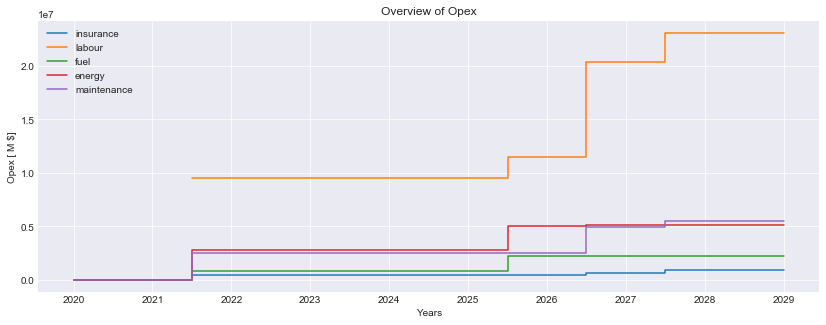

In [13]:
Terminal.opex_plot(cash_flows)

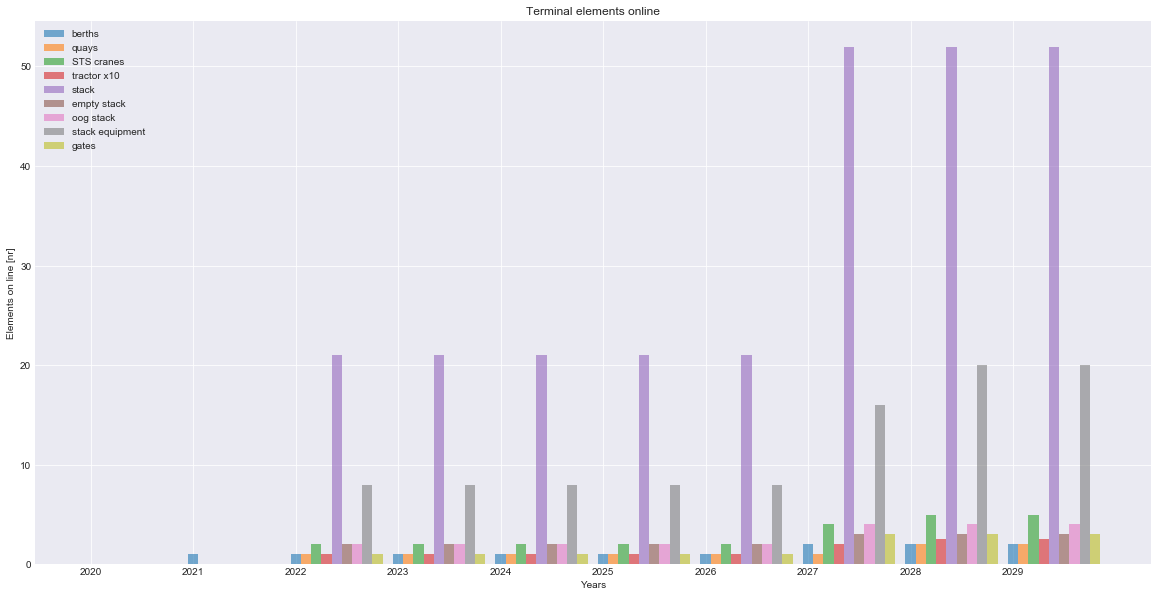

In [14]:
Terminal.terminal_elements_plot()

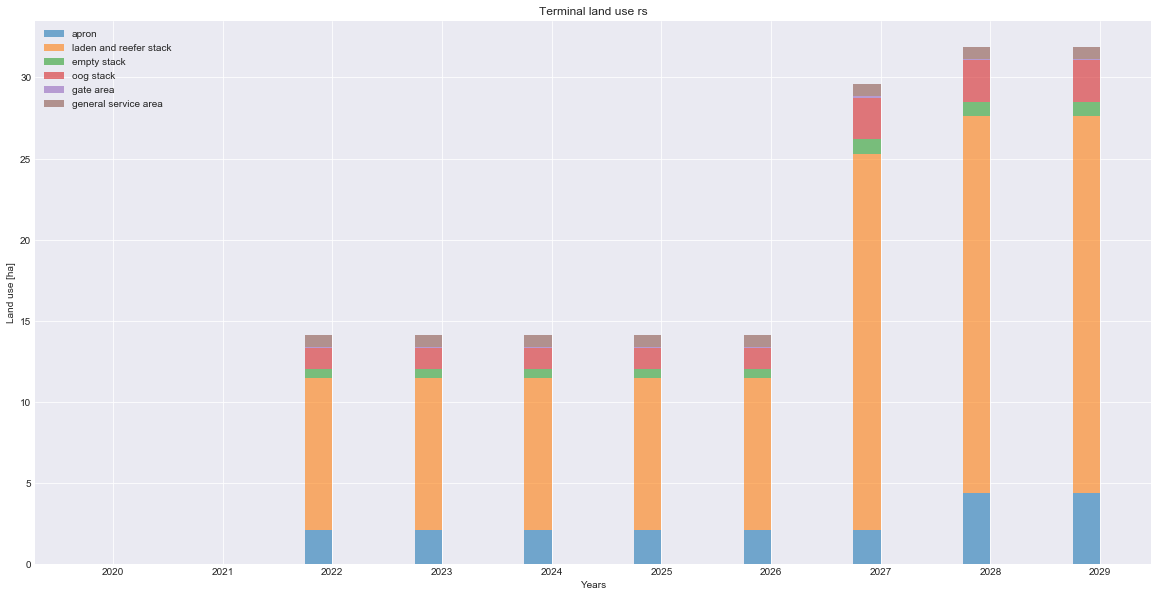

In [15]:
Terminal.land_use_plot()

In [16]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

-250049054.65450907


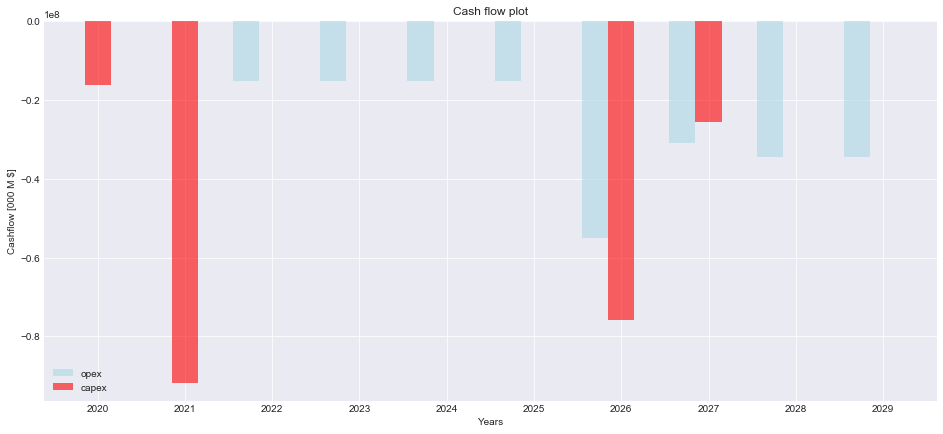

In [17]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [18]:
Terminal.NPV()

(-250049054.65450907,
 array([16195584. , 91829451. ,        0. ,        0. ,        0. ,
               0. , 75831176.4, 25696145.6,        0. ,        0. ]),
 array([              nan,               nan, 16160767.44585752,
        16160767.44585752, 16160767.44585752, 16160767.44585752,
        57135166.13456362, 33214465.4343938 , 36814204.8593938 ,
        36814204.8593938 ]),
 array([      nan,       nan,  9555000.,  9555000.,  9555000.,  9555000.,
        11515000., 20335000., 23082500., 23082500.]))